<h2 align='center' style='color:Purple'> 1. Exploratory Data Analysis </h2>

## Introduction

Customer churn is a pervasive concern cutting across multiple industries, including telecommunications, finance, e-commerce, subscription services, and beyond. This issue entails customers discontinuing their association with a company's products or services, leading to financial setbacks and escalated costs for acquiring new customers.

To address this issue, many sectors have undertaken projects to develop machine learning models for predicting and mitigating customer churn.

<h3 style='color:green'> Telecom churn </h3>

Telecom companies encounter a significant hurdle in the form of customer churn, leading to financial losses and escalated expenses for acquiring new customers. 

To tackle this concern, our initiative involved the creation of machine learning models for forecasting the probability of customer churn.

<h4 style='color:green'> Methodology </h4>

- Perform the end to end Exploratory Data Analysis 
- Explore two types of training (on imbalanced data and on balanced data), evaluate multiple models, and present our findings.
- Model deployment - flask API

<h4 style='color:green'> Dataset </h4>

Utilized an extensive dataset sourced from a Californian telecommunications company. This dataset encompassed diverse customer-related attributes, with each entry accompanied by a churn label denoting whether the customer had undergone churn or not.

In [335]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
%matplotlib inline

#### Load the data file

In [336]:
df=pd.read_csv('telco_churn_data.csv')

Top 5 records of data :

In [337]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


Check the various attributes of data like shape (rows and cols),Columns and datatypes

In [338]:
df.shape

(7043, 46)

#### Dataset Characteristics

In [339]:
df.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Population',
       'Churn Value', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction'],
      dtype='object')

Each row represents a customer, each column contains customer’s attributes.

The dataset contains details about customers, including:

- <u>Churn</u>: Whether the customer left within the last month (1 if yes, 0 if no).
- <u>Services</u>: Information about various services the customer has signed up for, including phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- <u>Customer Account Information</u>: Details about the customer's account, such as their tenure (how long they've been a customer), contract type, payment method, paperless billing preference, monthly charges, and total charges.
-<u>Demographic Information</u>: Demographic details about customers, including their gender, age range, and whether they have       partners and dependents.

This dataset appears to have factors related to customer churn in the telecom industry, including both service-related attributes and customer demographic information.







In [340]:
# data type of all the columns
df.dtypes

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

Observations in Train dataset:

- There are total of 46 columns: 20 numerical, 26 categorical, 1 id and 1 target column
- There are 7043 rows in entire data set
- Churn is the target variable

In [341]:
# Check the descriptive statistics of numeric variables
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


- 75% customers have tenure less than 55 months

- Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

Data balance ratio.

Text(0.5, 1.0, 'Count of target variable per category')

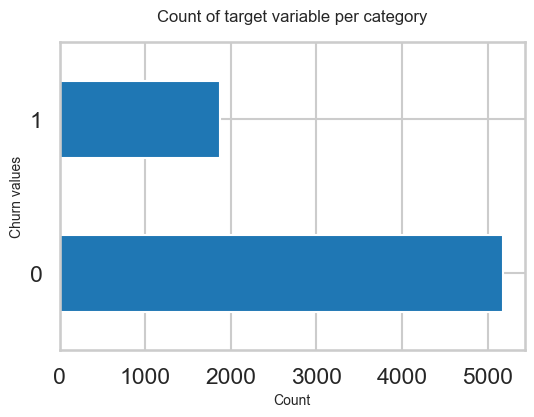

In [342]:
df['Churn Value'].value_counts().plot(kind='barh',figsize=(6,4))
plt.xlabel('Count')
plt.ylabel('Churn values')
plt.title('Count of target variable per category')

In [343]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [344]:
(df['Churn Value'].value_counts()*100)/len(df['Churn Value'])

0    73.463013
1    26.536987
Name: Churn Value, dtype: float64

- The dataset we are working with has a significant class imbalance in the target variable (churn). 
- The ratio of the two classes (churned(1) vs. not churned(0)) is approximately 73:27.
- To address this class imbalance and perform meaningful analysis, the suggestion is to analyze the data while considering the target values separately. 
- This typically involves conducting separate analyses for each class (churned and non-churned) to gain insights into how various features or attributes behave differently between the two groups.
- This approach helps ensure that the analysis is not biased by the disproportionate representation of the two classes and allows you to make more accurate and actionable conclusions about the factors influencing churn.
- By doing this, ywe can potentially uncover patterns, trends, or differences in customer behavior, preferences, or characteristics that might be contributing to churn.

### Data Preprocessing

<b>1.</b> Copy of dataset for manipulating and preprocessing.

In [345]:
telco_data=df.copy()

<h4><b>2.</b> Dealing with missing values</h4>

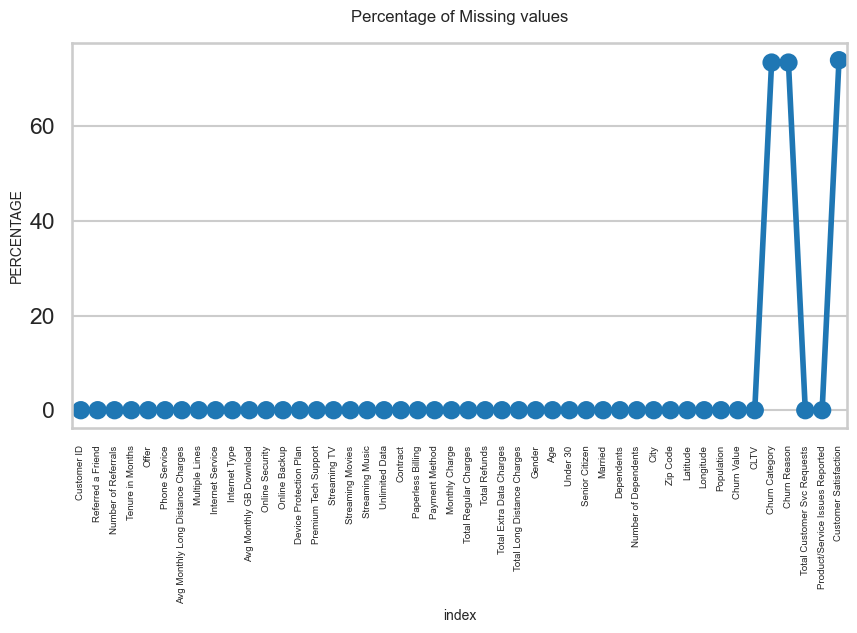

In [346]:
missing_data = pd.DataFrame((telco_data.isnull().sum()) * 100 / telco_data.shape[0]).reset_index()
plt.figure(figsize=(10, 5))
ax = sns.pointplot(x='index', y=0, data=missing_data)  # Specify 'x' and 'y' parameters
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<b>Missing Value Treatment</b>

In [347]:
# checking for missing percentage values
missing_percentages = (telco_data.isnull().sum() * 100 / len(telco_data)).sort_values(ascending=False)
missing_columns = missing_percentages[missing_percentages > 0]
print("Percentage of Missing Values for Columns with Missing Values:")
print(missing_columns)

Percentage of Missing Values for Columns with Missing Values:
Customer Satisfaction    73.959960
Churn Reason             73.463013
Churn Category           73.463013
dtype: float64


In [348]:
missing_columns = telco_data.columns[telco_data.isnull().any()]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
Index(['Churn Category', 'Churn Reason', 'Customer Satisfaction'], dtype='object')


- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
-For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

Here is a catch, we see missing values in columns like churn reason, category of churn because there are customers who have not churned yet, therefore the columns with missing values can not be considered to drop.

<b>4. Dealing with duplicate data</b>

In [349]:
print('Number of duplicate values in training dataset',telco_data.duplicated().sum())

Number of duplicate values in training dataset 0


In [350]:
#trimming spaces iin column names
telco_data.columns = df.columns.str.replace(' ', '_')

In [299]:
telco_data.columns

Index(['Customer_ID', 'Referred_a_Friend', 'Number_of_Referrals',
       'Tenure_in_Months', 'Offer', 'Phone_Service',
       'Avg_Monthly_Long_Distance_Charges', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Avg_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Regular_Charges',
       'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Gender', 'Age', 'Under_30',
       'Senior_Citizen', 'Married', 'Dependents', 'Number_of_Dependents',
       'City', 'Zip_Code', 'Latitude', 'Longitude', 'Population',
       'Churn_Value', 'CLTV', 'Churn_Category', 'Churn_Reason',
       'Total_Customer_Svc_Requests', 'Product/Service_Issues_Reported',
       'Customer_Satisfaction'],
      dtype='object')

<b>5.Considering the columns required for analysis.</b> 

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group of 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [351]:
# Get the max tenure
telco_data['Tenure_in_Months'].max()

72

In [352]:
# Group the tenure in bins of 12 months

labels= ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
labels

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [353]:
telco_data['tenure_group'] = pd.cut(telco_data['Tenure_in_Months'], range(1, 74, 12), right=False, labels=labels)

In [354]:
telco_data['tenure_group']

0        1 - 12
1        1 - 12
2       13 - 24
3       25 - 36
4       37 - 48
         ...   
7038    61 - 72
7039    13 - 24
7040    61 - 72
7041     1 - 12
7042    61 - 72
Name: tenure_group, Length: 7043, dtype: category
Categories (6, object): ['1 - 12' < '13 - 24' < '25 - 36' < '37 - 48' < '49 - 60' < '61 - 72']

In [355]:
telco_data['tenure_group']

0        1 - 12
1        1 - 12
2       13 - 24
3       25 - 36
4       37 - 48
         ...   
7038    61 - 72
7039    13 - 24
7040    61 - 72
7041     1 - 12
7042    61 - 72
Name: tenure_group, Length: 7043, dtype: category
Categories (6, object): ['1 - 12' < '13 - 24' < '25 - 36' < '37 - 48' < '49 - 60' < '61 - 72']

In [356]:
telco_data['tenure_group'].value_counts().sort_values()

37 - 48     762
25 - 36     832
49 - 60     832
13 - 24    1024
61 - 72    1407
1 - 12     2186
Name: tenure_group, dtype: int64

- The customers with tenure of 1, 2 and 3 years are more.

In [307]:
# Remove columns not required for processing
telco_data.drop(columns=['Customer_ID','Tenure_in_Months','Offer','City','Age','Latitude','Longitude','Churn_Category', 'Churn_Reason','Customer_Satisfaction',
                        'Zip_Code','Population','CLTV','Total_Customer_Svc_Requests','Product/Service_Issues_Reported','Avg_Monthly_Long_Distance_Charges','Avg_Monthly_GB_Download'],axis=1,inplace=True)


In [308]:
telco_data.columns

Index(['Referred_a_Friend', 'Number_of_Referrals', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Regular_Charges',
       'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Gender', 'Under_30', 'Senior_Citizen',
       'Married', 'Dependents', 'Number_of_Dependents', 'Churn_Value',
       'tenure_group'],
      dtype='object')

In [309]:
telco_data.head(3)

,Referred_a_Friend,Number_of_Referrals,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,...,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Gender,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Churn_Value,tenure_group
0,No,0,No,No,Yes,Fiber Optic,No,No,Yes,No,...,0.0,0.00,Male,No,Yes,No,No,0,1,1 - 12
1,Yes,1,Yes,Yes,Yes,Cable,No,Yes,No,No,...,120.0,390.80,Female,No,Yes,Yes,Yes,1,1,1 - 12
2,No,0,Yes,Yes,Yes,Fiber Optic,No,No,No,No,...,0.0,203.94,Male,No,Yes,No,Yes,3,1,13 - 24


<h3><b>Data Exploration</b></h3>

<b>1.</b> Plot distribution of Individual predictors by churn

<b>Univariate Analysis</b>

C:\Users\Roopa\AppData\Local\Temp\ipykernel_8408\2143953481.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


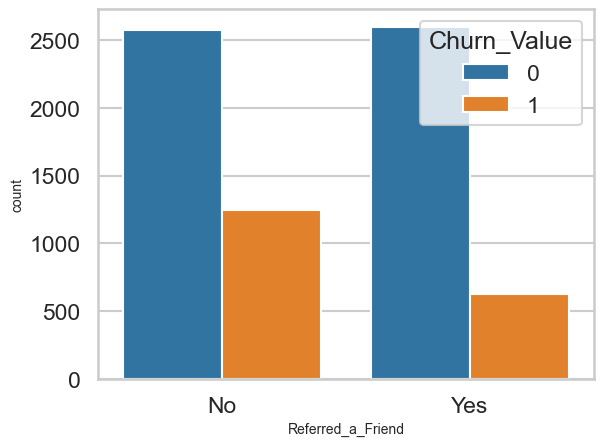

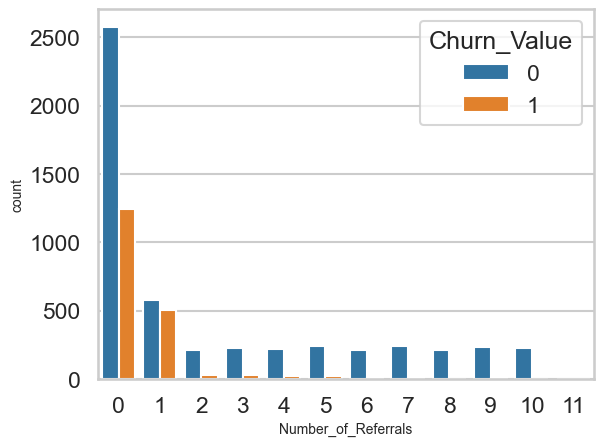

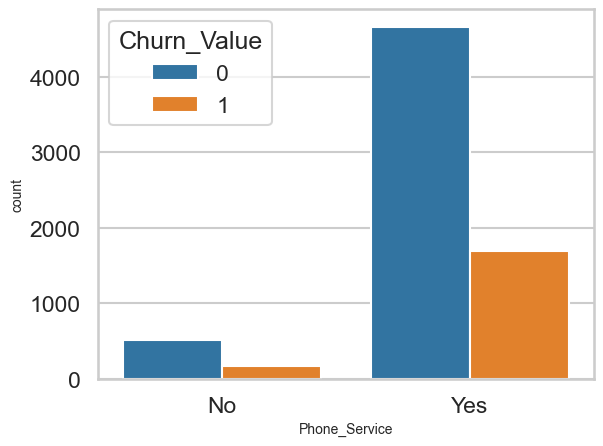

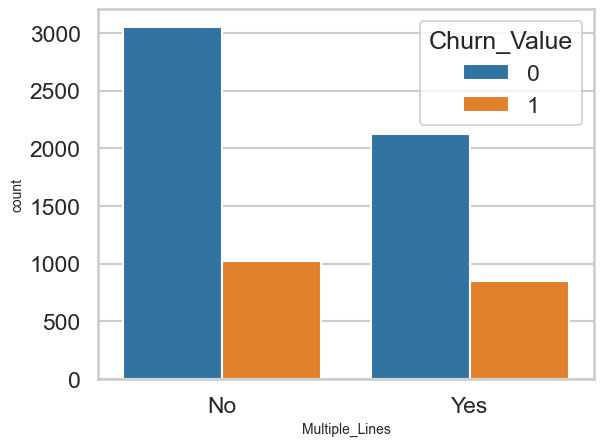

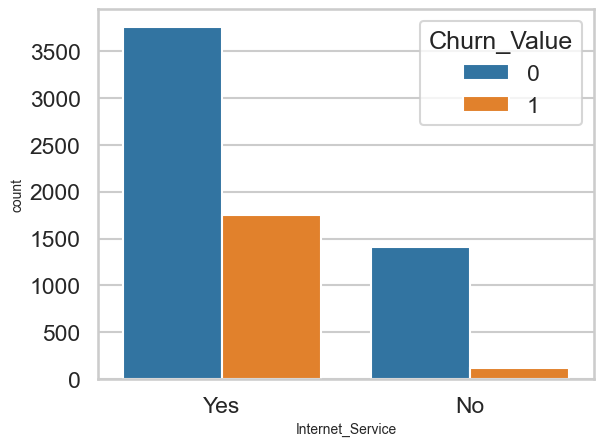

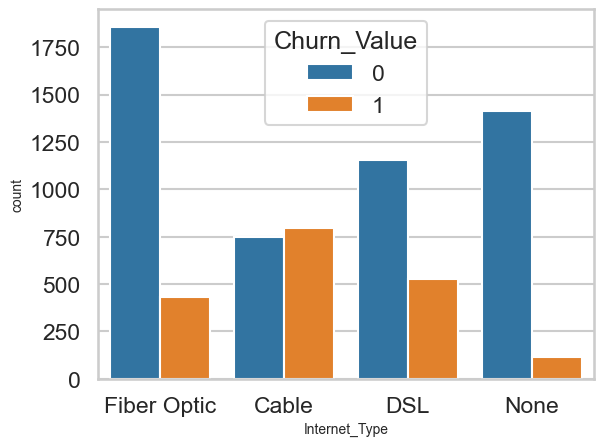

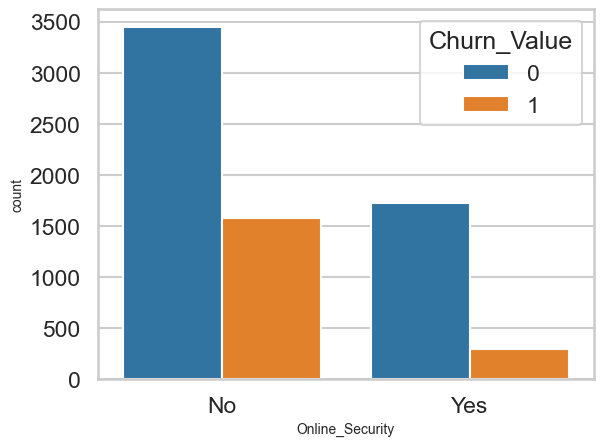

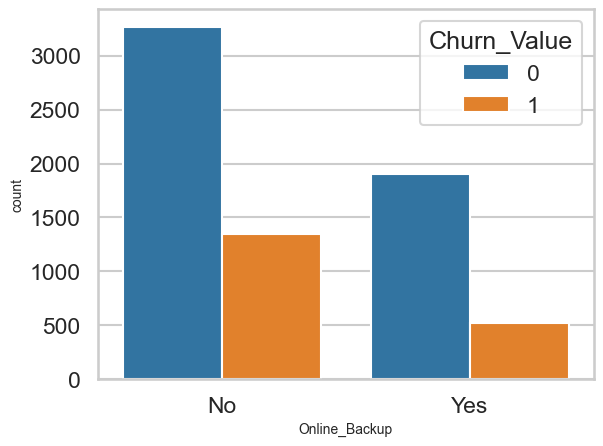

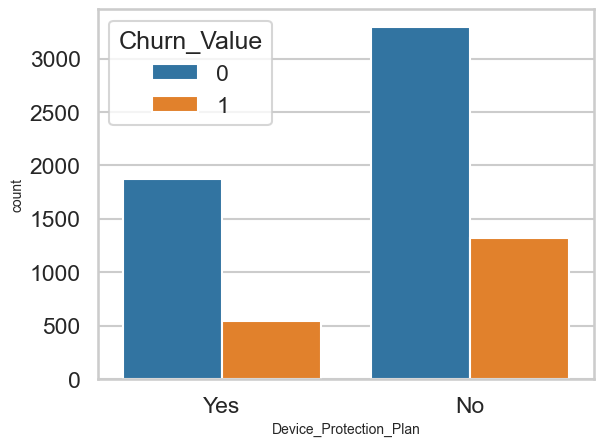

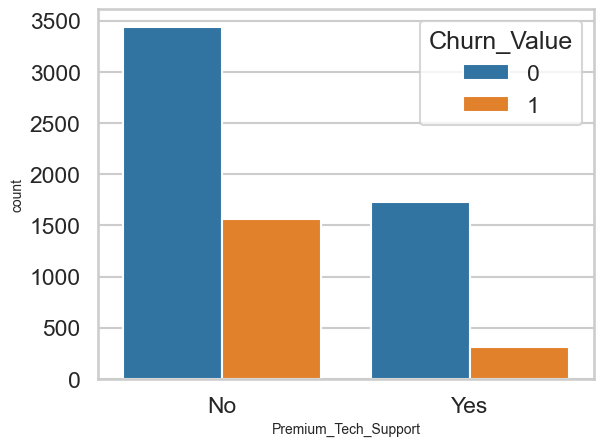

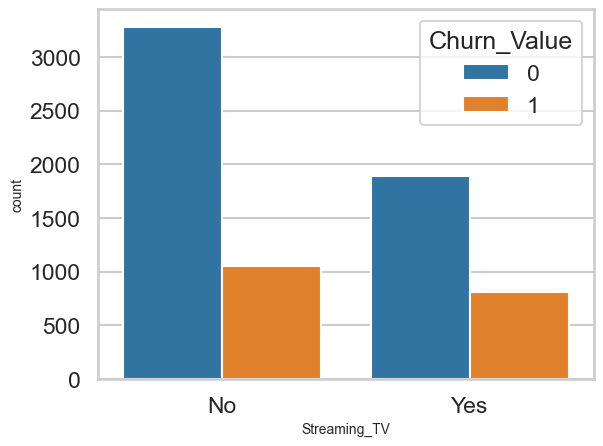

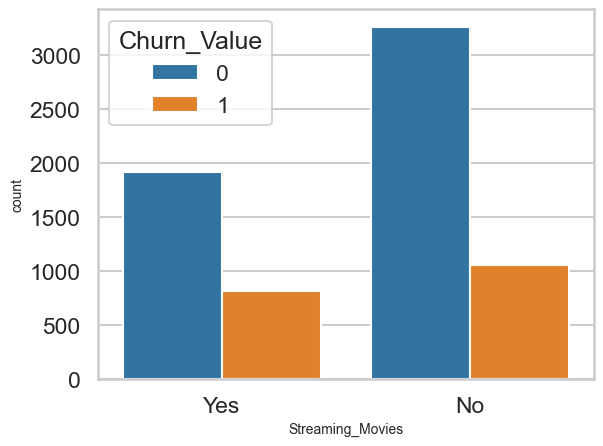

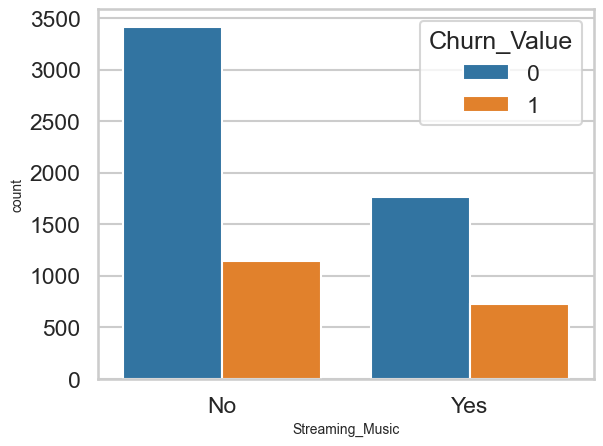

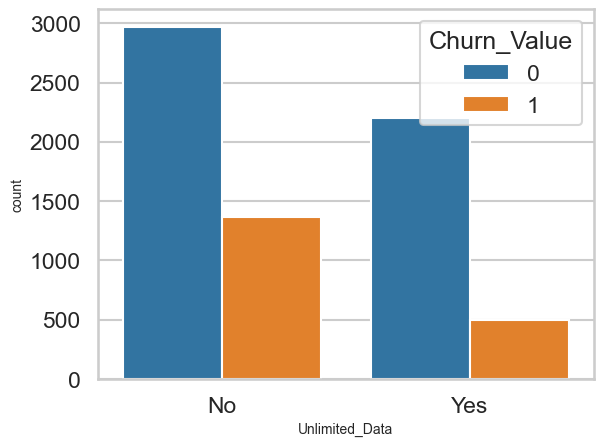

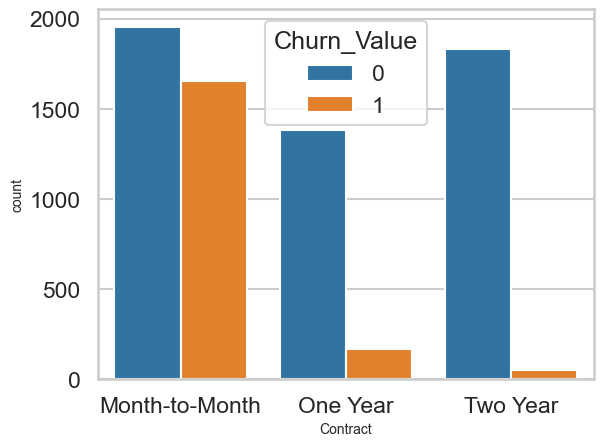

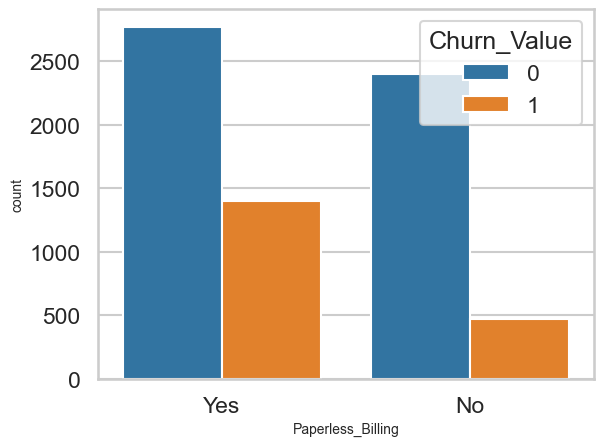

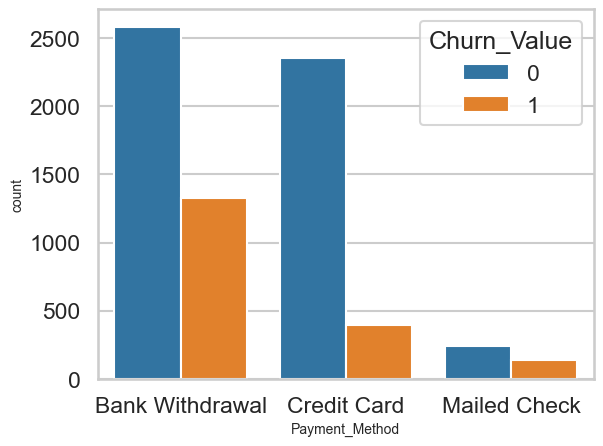

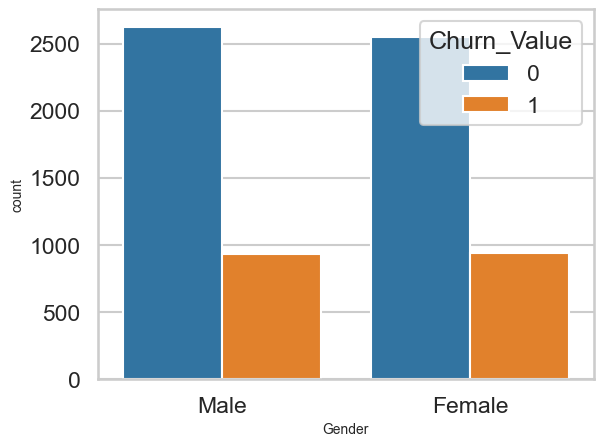

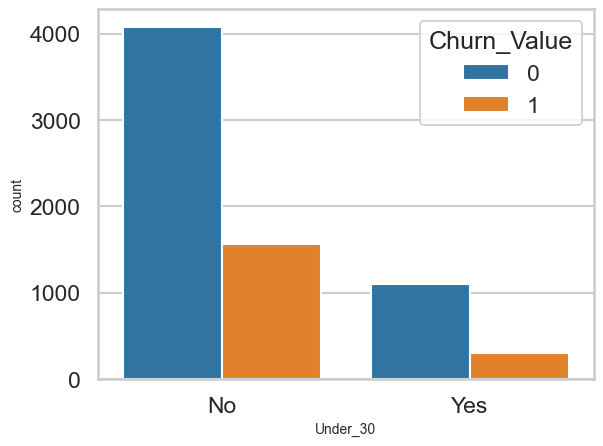

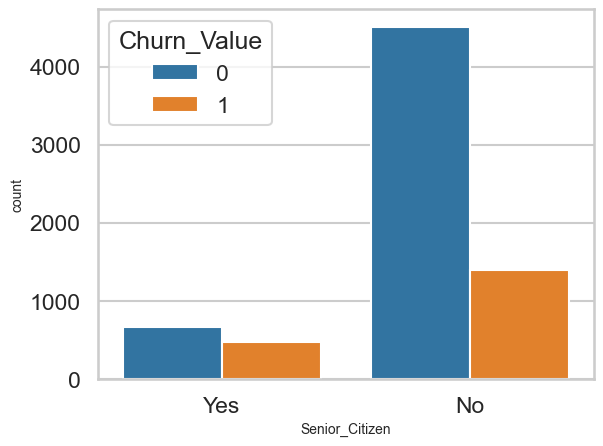

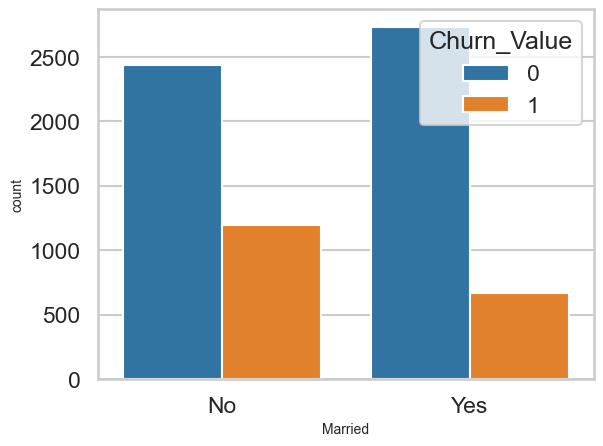

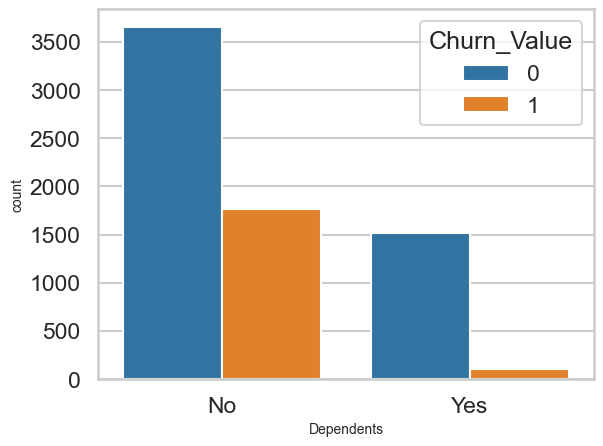

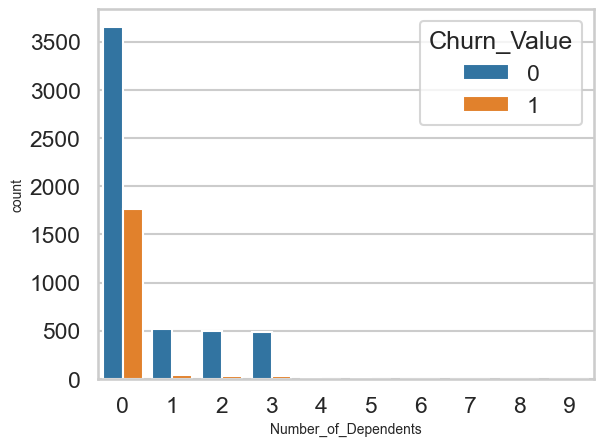

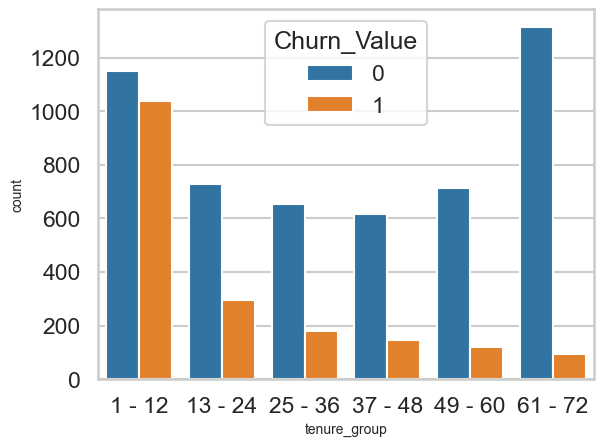

In [311]:
for i, predictor in enumerate(telco_data.drop(columns=['Total_Long_Distance_Charges','Monthly_Charge','Total_Regular_Charges','Total_Refunds','Total_Extra_Data_Charges','Total_Extra_Data_Charges','Churn_Value'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn_Value')

<b>2.</b> Convert the target variable 'Churn Value' in a binary numeric variable i.e. Yes=1 ; No = 0

In [312]:
telco_data['Churn_Value'] = telco_data['Churn_Value'].replace({'Yes': 1, 'No': 0})

In [313]:
telco_data['Churn_Value'].head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

<b>3.</b> Convert all categorical variables into dummy variables

In [314]:
telco_data_dummies=pd.get_dummies(telco_data)
telco_data_dummies

,Number_of_Referrals,Monthly_Charge,Total_Regular_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Number_of_Dependents,Churn_Value,Referred_a_Friend_No,Referred_a_Friend_Yes,...,Married_No,Married_Yes,Dependents_No,Dependents_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,41.236,39.65,0.00,0.0,0.00,0,1,1,0,...,1,0,1,0,1,0,0,0,0,0
1,1,83.876,633.30,0.00,120.0,390.80,1,1,0,1,...,0,1,0,1,1,0,0,0,0,0
2,0,99.268,1752.55,45.61,0.0,203.94,3,1,1,0,...,1,0,0,1,0,1,0,0,0,0
3,1,102.440,2514.50,13.43,327.0,494.00,1,1,0,1,...,0,1,0,1,0,0,1,0,0,0
4,1,79.560,2868.15,0.00,430.0,234.21,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,21.150,1419.40,19.31,0.0,1639.44,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
7039,1,84.800,1990.50,48.23,0.0,865.20,2,0,0,1,...,0,1,0,1,0,1,0,0,0,0
7040,4,103.200,7362.90,45.38,4344.0,2135.52,2,0,0,1,...,0,1,0,1,0,0,0,0,0,1
7041,1,29.600,346.45,27.24,0.0,0.00,2,0,0,1,...,0,1,0,1,1,0,0,0,0,0


<b>4.</b> Relationship between monthly charges and total regular charges.

C:\Users\Roopa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


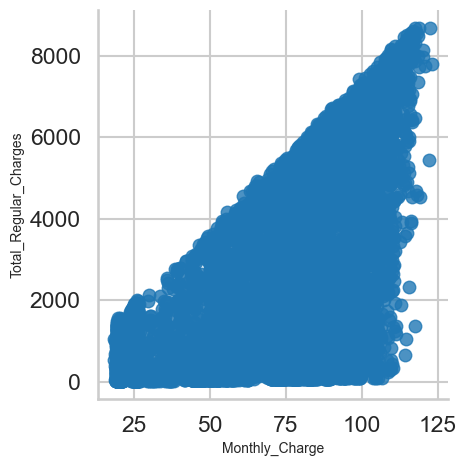

In [315]:
sns.lmplot(data=telco_data_dummies,x='Monthly_Charge',y='Total_Regular_Charges',fit_reg=False)

<b>5.</b> Relationship between Avg Monthly Long Distance Charges and Total Long Distance Charges.

<b>6.</b> Churn by monthly charges and total regular charges.

Text(0.5, 1.0, 'Monthly charges by title')

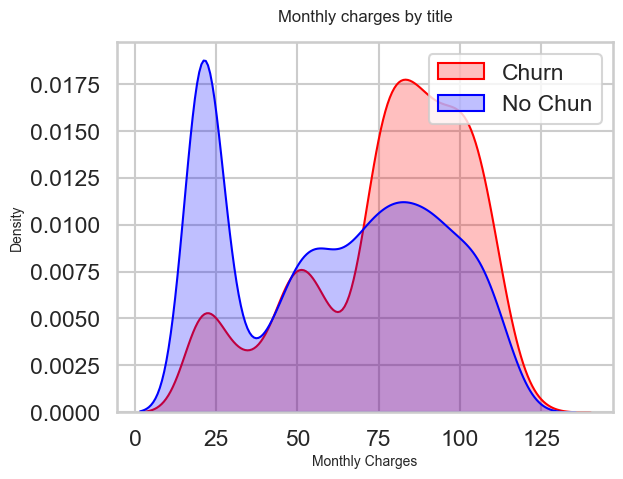

In [321]:
Mth = sns.kdeplot(telco_data_dummies.Monthly_Charge[(telco_data_dummies["Churn_Value"] == 1) ],
                color="Red", fill = True)
Mth = sns.kdeplot(telco_data_dummies.Monthly_Charge[(telco_data_dummies["Churn_Value"] == 0) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(['Churn','No Chun'],loc='upper right')
Mth.set_xlabel('Monthly Charges')
Mth.set_ylabel('Density')
Mth.set_title('Monthly charges by title')

<b>Insight:</b> Customers churn when Monthly charges are high.

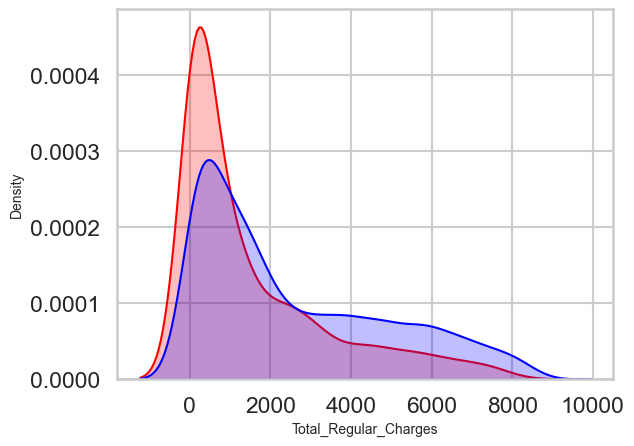

In [322]:
Mth=sns.kdeplot(telco_data_dummies.Total_Regular_Charges[(telco_data_dummies.Churn_Value==1)],color='Red',fill=True)
Mth=sns.kdeplot(telco_data_dummies.Total_Regular_Charges[(telco_data_dummies.Churn_Value==0)],color='Blue',fill=True)

<b>Insight:</b> Suprisingly, customers have churned at low total charges. 
If we try to understand the reason, by combining three features: Tenure, monthly charges and total regular charges. 
Customers with <b>Low Tenure, High monthly charges and lower total charges have churned.</b>

<b>7.</b> Correlation of all predictors with respect to churn

<Axes: >

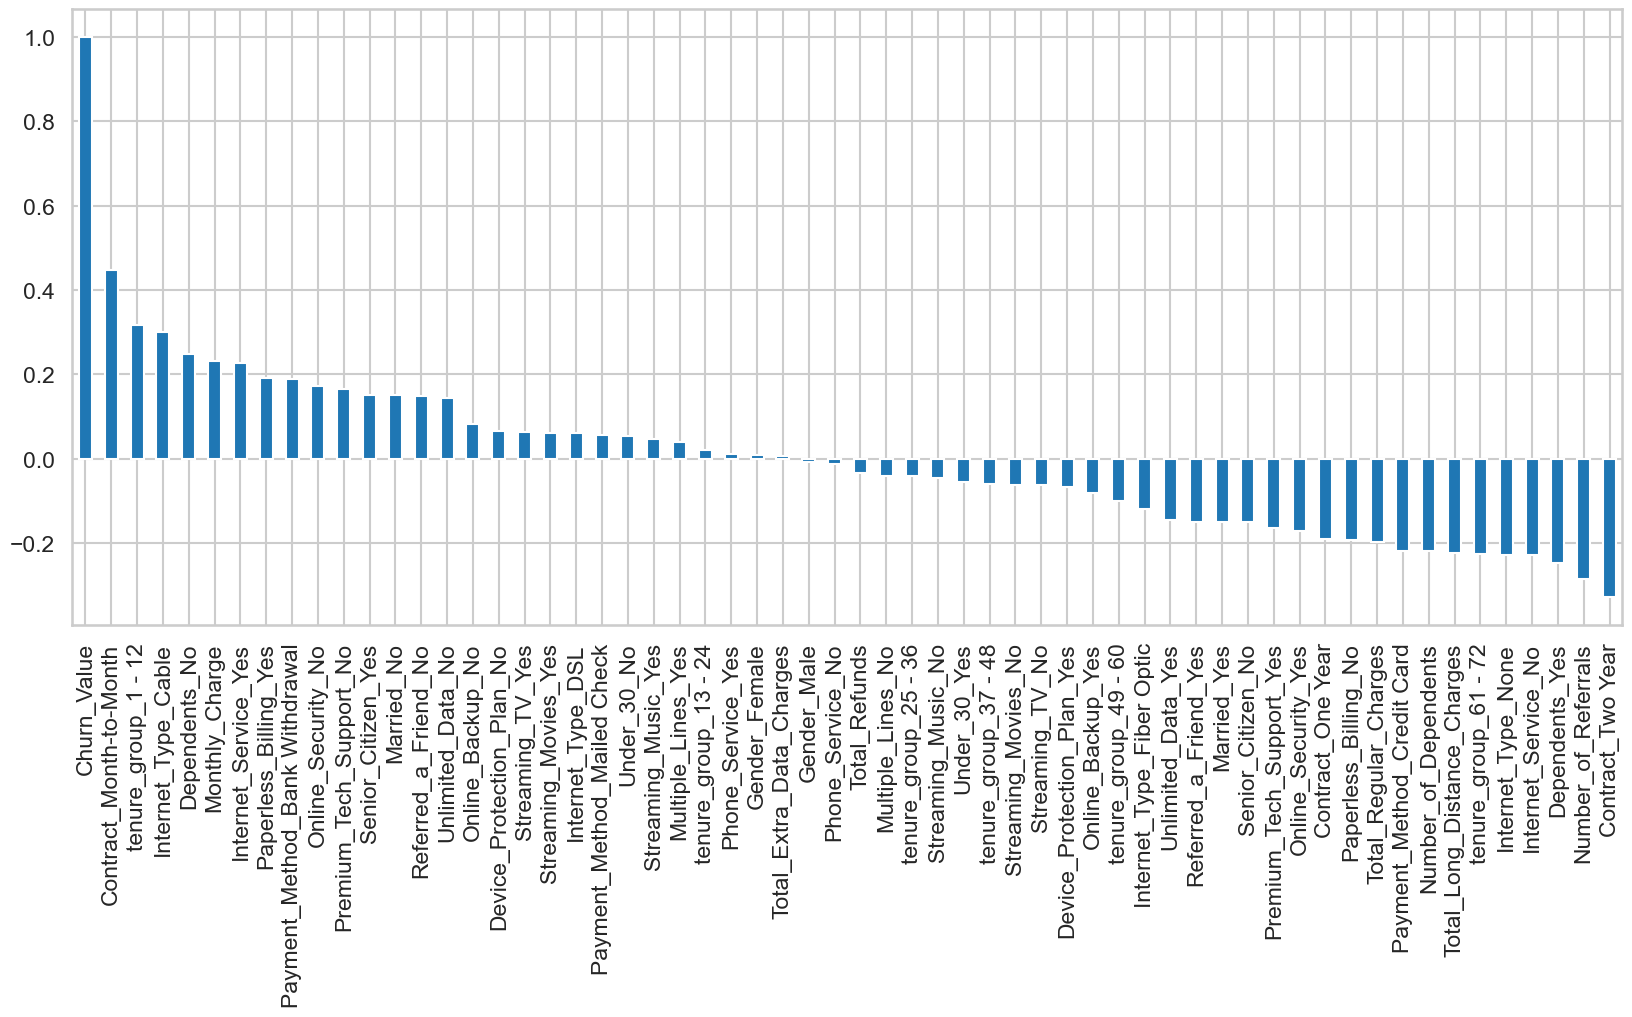

In [323]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn_Value'].sort_values(ascending=False).plot(kind='bar')

<b>HIGH Churn : </b> seen in  <b>Month to month contracts,First year of subscription,Cable internet,No dependents,no online security, no premium tech support,senior citizen,unmarried,no unlimited data,no online backup,no protection.</b>

<b>LOW Churn : </b> seen in case of <b>Long term contracts,has dependents,married,online security,Premium tech support,Subscriptions without internet service and The customers engaged for 5+ years</b>

Factors like Gender, Availability of PhoneService and no. of multiple lines have alomost NO impact on Churn.

let's see with <b> Heatmap </b>

<Axes: >

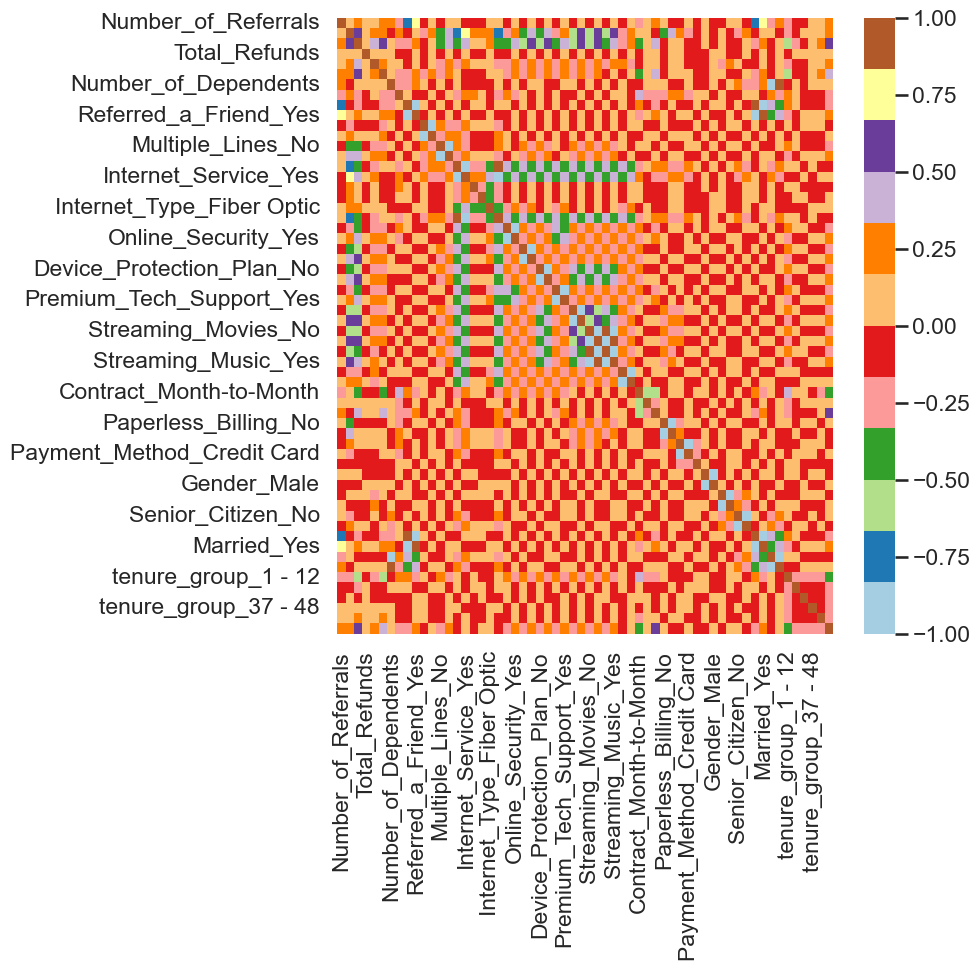

In [324]:
plt.figure(figsize=(8,8))
sns.heatmap(telco_data_dummies.corr(),cmap='Paired')

<b> Bivariate Analysis </b>

In [325]:
not_churned_df=telco_data.loc[telco_data['Churn_Value']==0]

In [326]:
churned_df=telco_data[telco_data['Churn_Value']==1]

In [327]:
churned_col_df=churned_df[['Referred_a_Friend', 'Number_of_Referrals','Phone_Service','Multiple_Lines',
       'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract','tenure_group','Paperless_Billing',
       'Payment_Method', 'Under_30', 'Senior_Citizen',
       'Married', 'Dependents', 'Number_of_Dependents'
       ]]

In [328]:
def uniplot(dataframe,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.titlepad'] = 15
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    #width = len(dataframe[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(6,6)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = dataframe, x= col, order=dataframe[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

<Figure size 640x480 with 0 Axes>

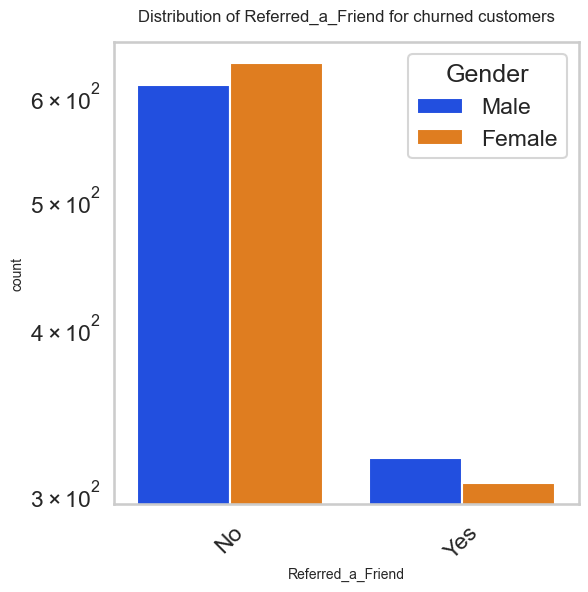

<Figure size 640x480 with 0 Axes>

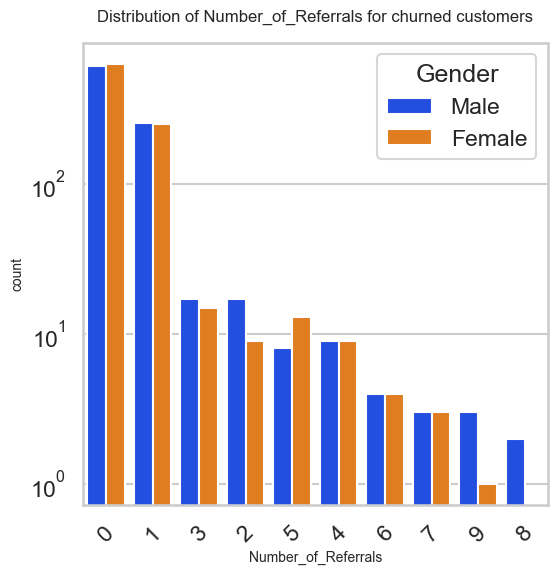

<Figure size 640x480 with 0 Axes>

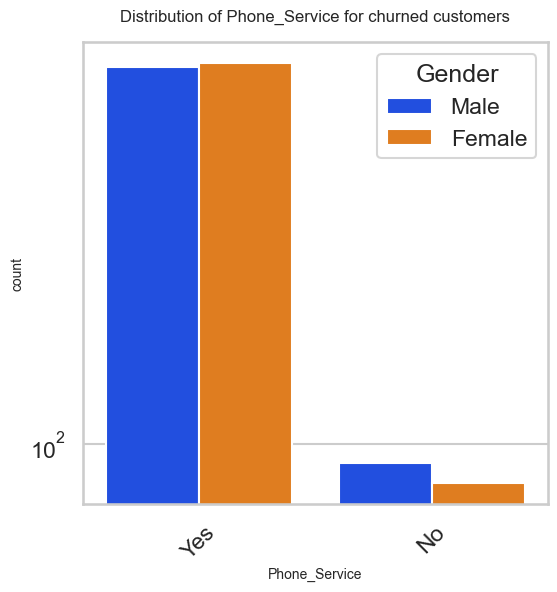

<Figure size 640x480 with 0 Axes>

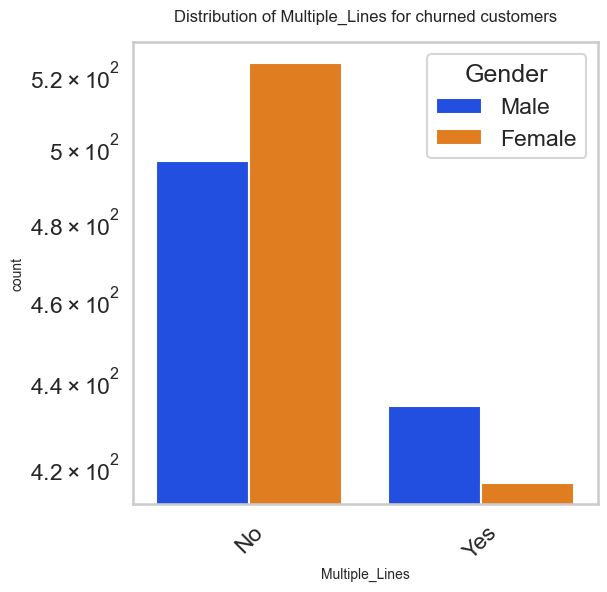

<Figure size 640x480 with 0 Axes>

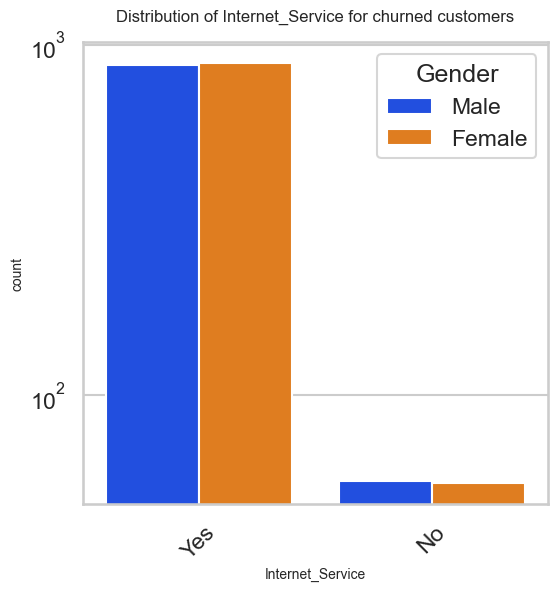

<Figure size 640x480 with 0 Axes>

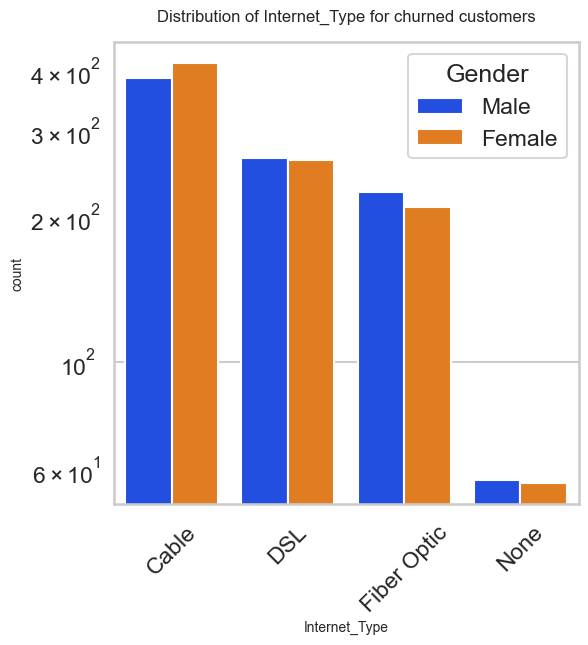

<Figure size 640x480 with 0 Axes>

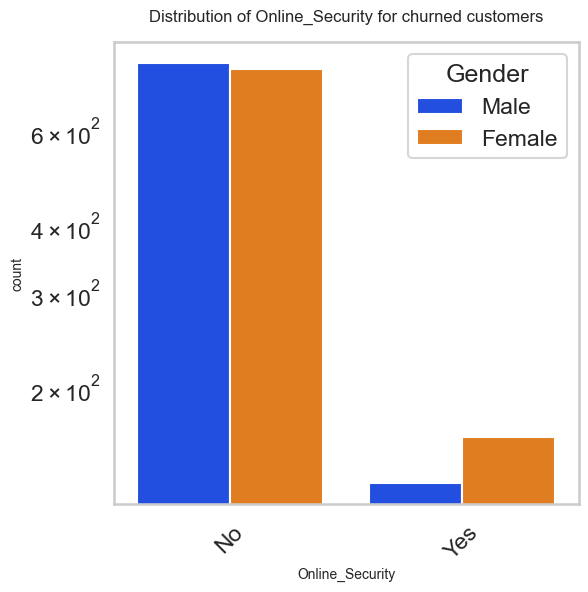

<Figure size 640x480 with 0 Axes>

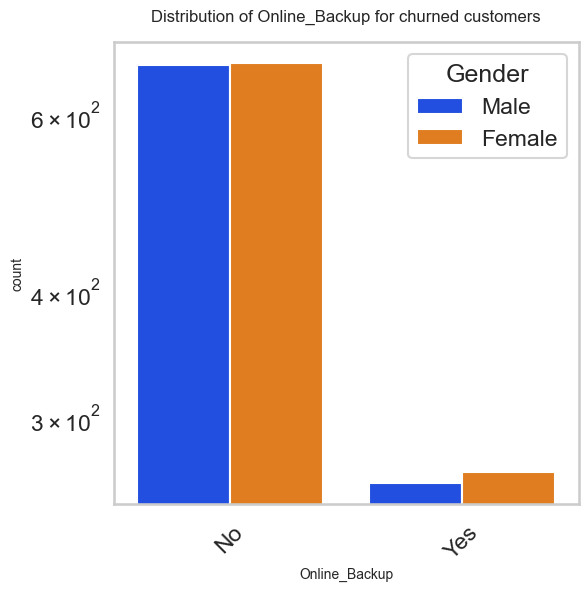

<Figure size 640x480 with 0 Axes>

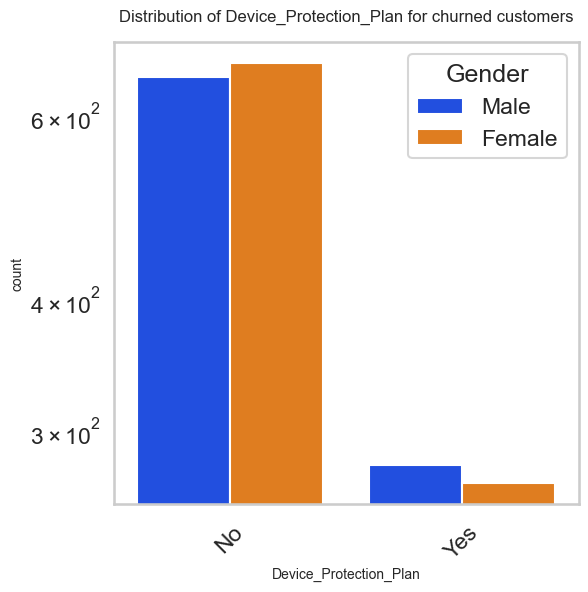

<Figure size 640x480 with 0 Axes>

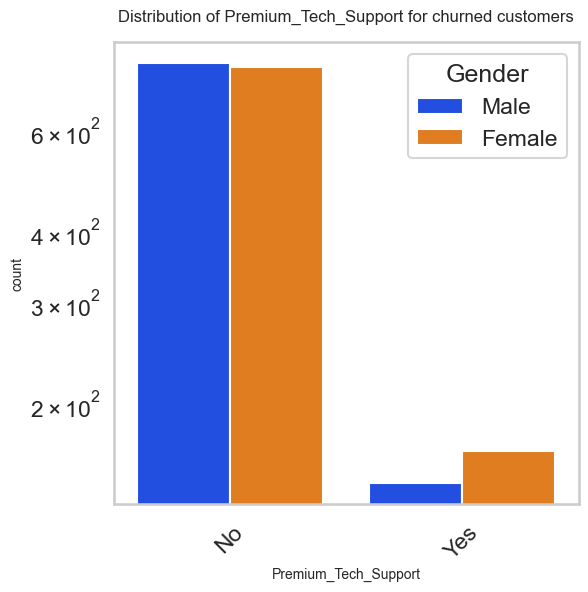

<Figure size 640x480 with 0 Axes>

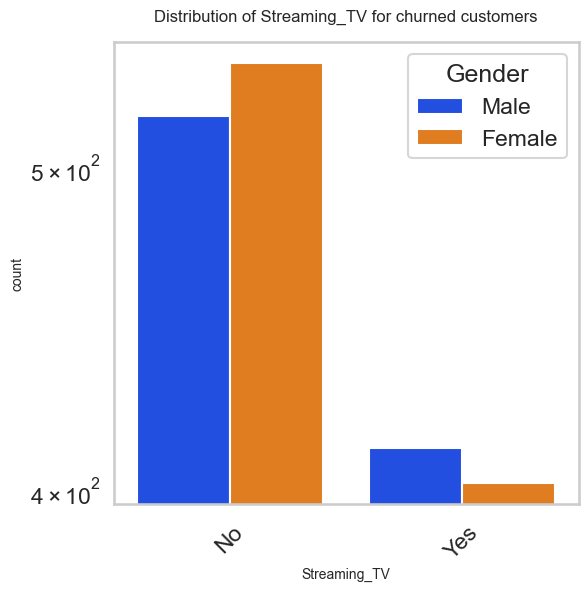

<Figure size 640x480 with 0 Axes>

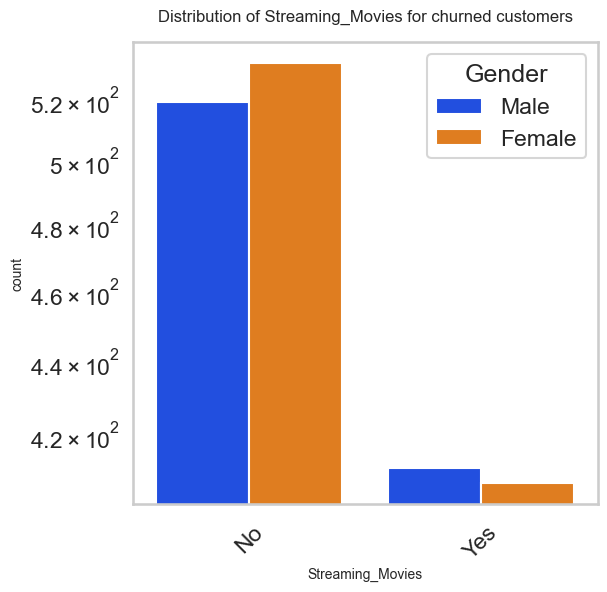

<Figure size 640x480 with 0 Axes>

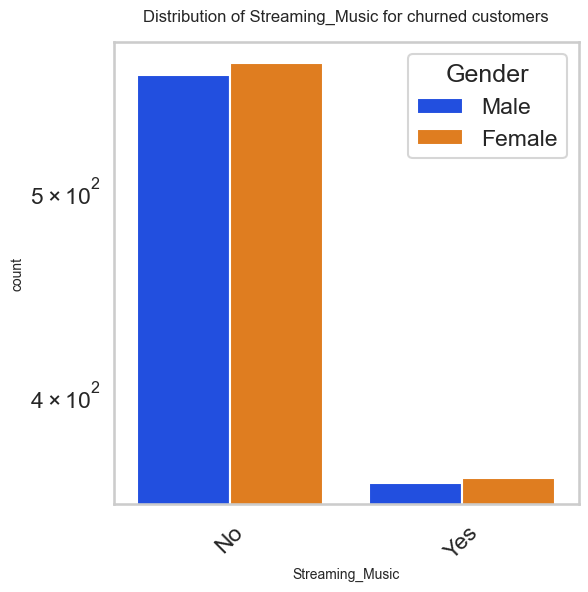

<Figure size 640x480 with 0 Axes>

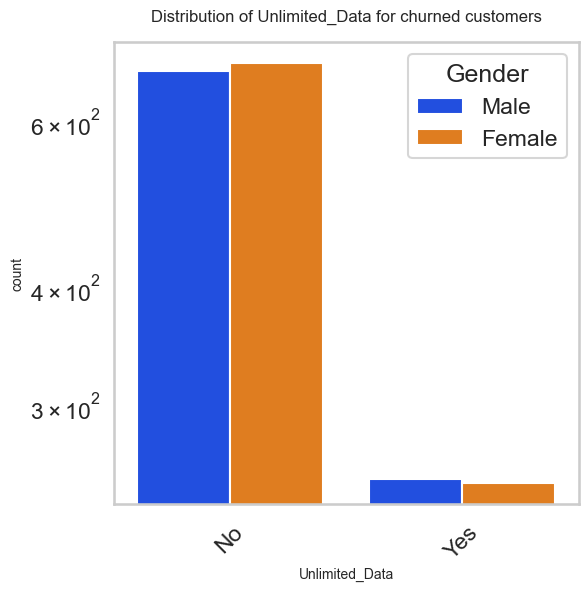

<Figure size 640x480 with 0 Axes>

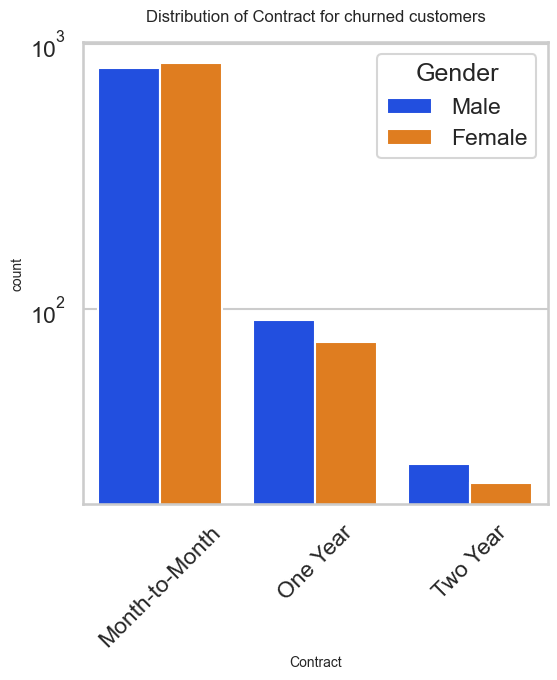

<Figure size 640x480 with 0 Axes>

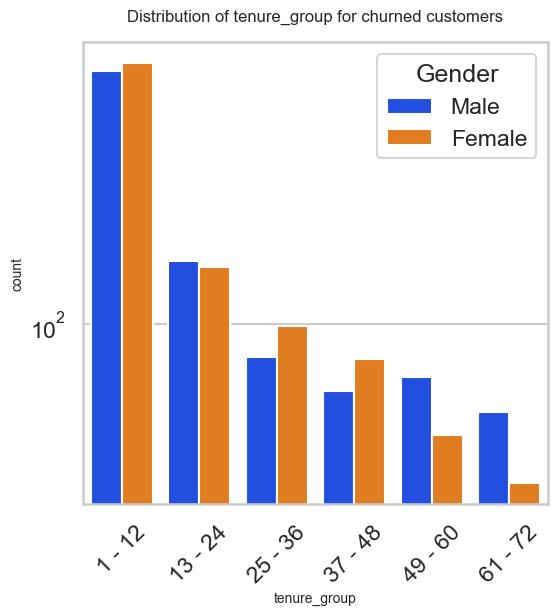

<Figure size 640x480 with 0 Axes>

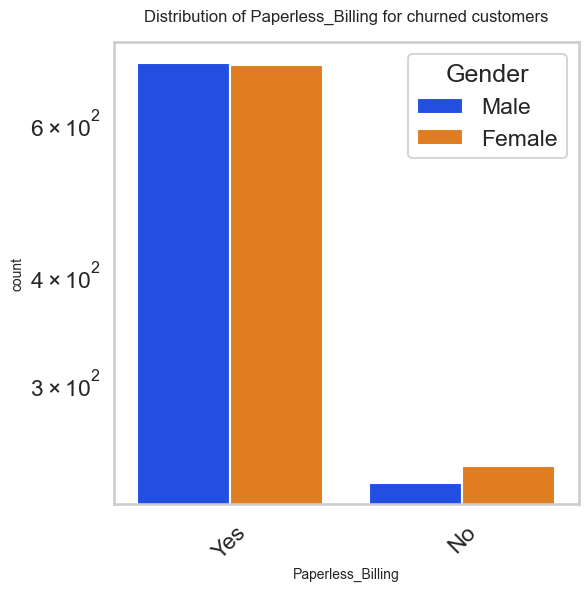

<Figure size 640x480 with 0 Axes>

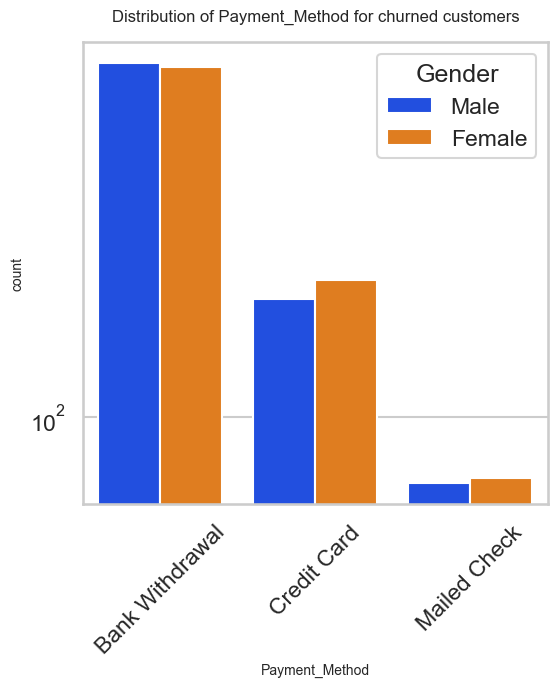

<Figure size 640x480 with 0 Axes>

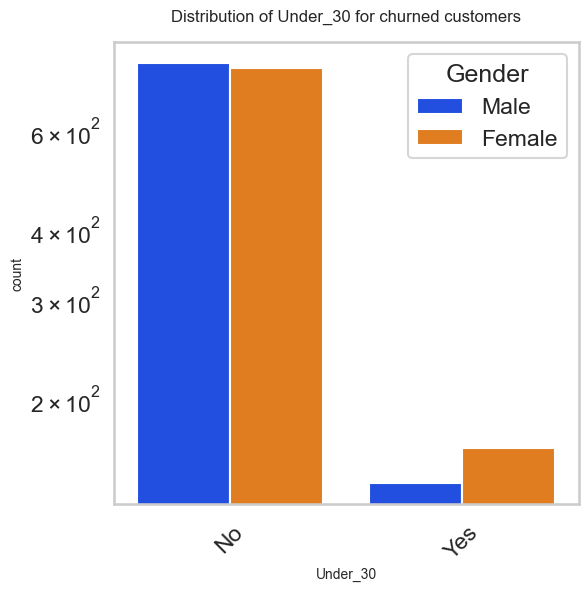

<Figure size 640x480 with 0 Axes>

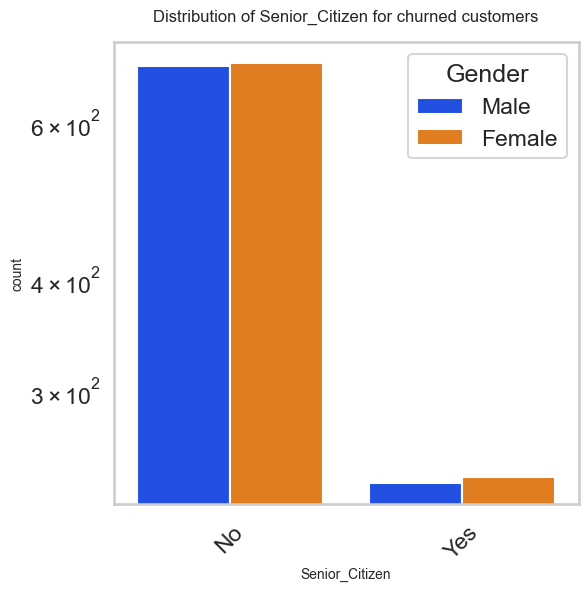

<Figure size 640x480 with 0 Axes>

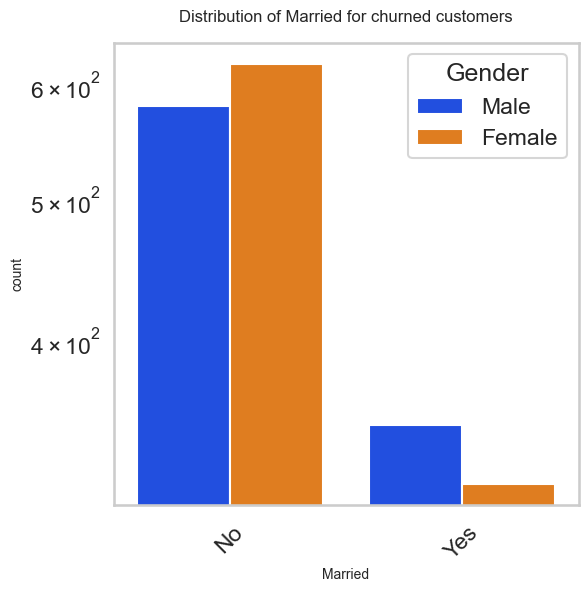

<Figure size 640x480 with 0 Axes>

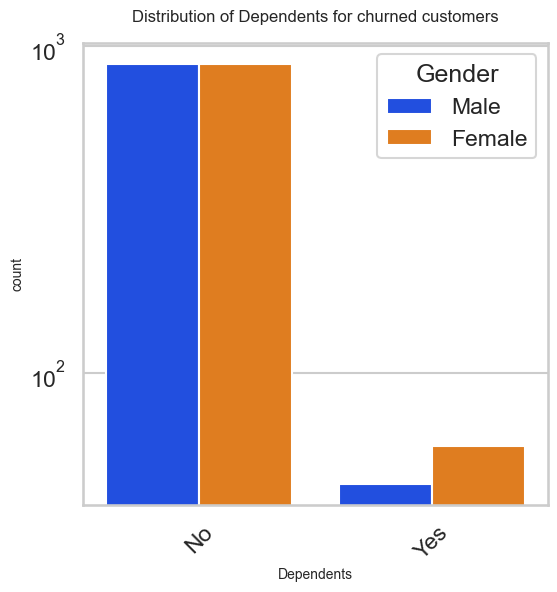

<Figure size 640x480 with 0 Axes>

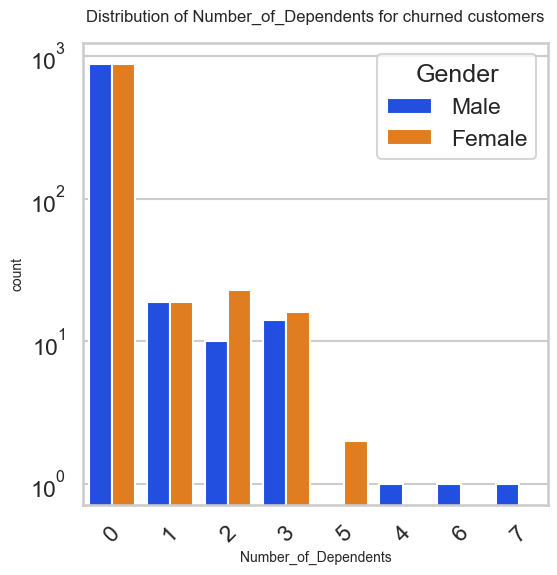

In [329]:
for i, predictor in enumerate(churned_col_df):
    plt.figure(i)
    uniplot(churned_df,col=predictor,title=f'Distribution of {predictor} for churned customers',hue='Gender')
    

<h3><b>CONCLUSION</b></h3>

These are some of the quick insights :


- Phone Service : Customers with phone service are high churners.
- Multiple lines : Customers with no multiple lines are high churners.
- Internet_service : Customers who availed Internet service are high churners.
- Internt_type : Customers with Cable and DSL are more likely to churn than fibre optic.
- No Online security, No Online Backup, No device protection, No premium tech support, No streaming TV,
  No streaming movies,No streaming music No unlimited data : high churners.
- Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
- Bank withdrawal medium are highest churners.
- High churners are not under age 30.
- Non senior Citizens and Unmarried customers are high churners.
- No dependents and female with 2 to 5 dependents are high churners.


#### Saving telco_data to CSV file.

In [333]:
# # Save DataFrame to a CSV file without including the index
telco_data_dummies.to_csv('tel_churn.csv',index=False)

In [334]:
telco_data_dummies.columns

Index(['Number_of_Referrals', 'Monthly_Charge', 'Total_Regular_Charges',
       'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Number_of_Dependents', 'Churn_Value',
       'Referred_a_Friend_No', 'Referred_a_Friend_Yes', 'Phone_Service_No',
       'Phone_Service_Yes', 'Multiple_Lines_No', 'Multiple_Lines_Yes',
       'Internet_Service_No', 'Internet_Service_Yes', 'Internet_Type_Cable',
       'Internet_Type_DSL', 'Internet_Type_Fiber Optic', 'Internet_Type_None',
       'Online_Security_No', 'Online_Security_Yes', 'Online_Backup_No',
       'Online_Backup_Yes', 'Device_Protection_Plan_No',
       'Device_Protection_Plan_Yes', 'Premium_Tech_Support_No',
       'Premium_Tech_Support_Yes', 'Streaming_TV_No', 'Streaming_TV_Yes',
       'Streaming_Movies_No', 'Streaming_Movies_Yes', 'Streaming_Music_No',
       'Streaming_Music_Yes', 'Unlimited_Data_No', 'Unlimited_Data_Yes',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
   